<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/Math345_LAB_W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binomial Distribution

In this session, we will go over the binomial distribution. ***One can think of it as a probability distribution of a sequence of experiments with independednt binary outcomes.*** An independent outcome means that the outcome of each experiment does not depend on the previous outcomes.


The most common example that follows a binomial distribution is the coin flip, which we will discuss below. 

*Note:* The outcomes of the experiment don't need to be equal, i.e. $p(H) \neq p(T)$.  

Other examples that follow a binomial distribution:

*   Surveying people using Yes or No questions. 
*   Attempting to convince a visitor to buy a product.



> **Important Quantities**

$n$ - the number of trimes times the experiment is performed;

$p$ - probability of success

$k$ - the targeted number of successes.

If we conised the coin flip example, then a question could be formulated as folows: 

Given a fair coin $p(H) = p(T) = \frac{1}{2}$, find the probability of getting $k = 4$ heads when flipping the coin $n=10$ times.

# Coin Flipping Example

For what follows, let's see what a binomial distribution looks like by analyzing the coin flipping example. Consider a fair coin $ p = 0.5$. The plan is to conduct $N = 20 000$ trials of $n = 10$ flips. By counting the total number of heads $H$ per trial we will be able to compute and visualize the probability of getting $1,2,3, ...$ heads.

In [ ]:
# start by importing useful libraries

import numpy as np

from math import factorial as fact # importing the factorial function from the math library and defining a shorthand notation

import matplotlib.pyplot as plt

In [ ]:
np.random.seed(24) # make sure that everyone gets the same results 
# DO NOT CHANGE the seed when submitting your notebook.

N = 20000 # number of trials 

n = 10   # number of flips per trial
p = 0.5  # probability of heads

total_cases = 2**n # total number of possibilities

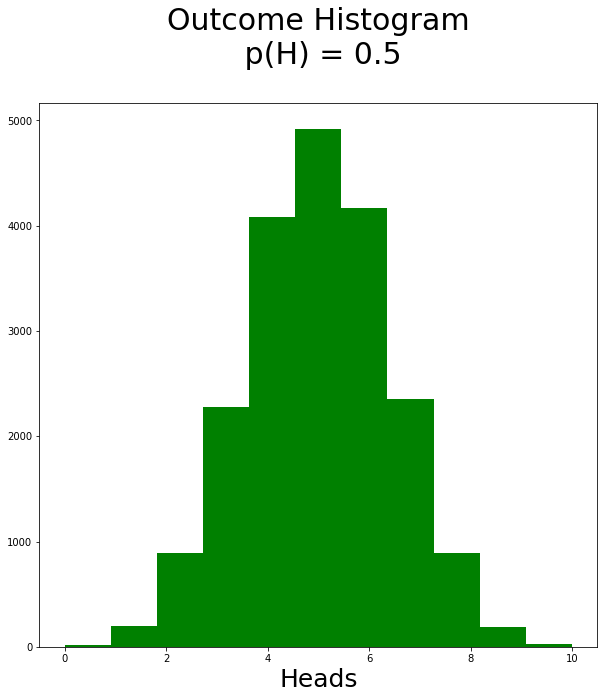

In [ ]:
# Let's flip some coins 

result = []

# Go through one single trial and explain the code

for i in range(N):
  trial = ( np.random.rand(n) <= p ) # returns a list of 10 boolean function (True = H, False = T)
  result.append( np.sum(trial)) # computes the total number of heads for each trial

# Having the results of a large number of trials, we can have a raw visual of the binomial distribution via the plotting the histogram 

plt.figure(figsize = (10,10))

plt.hist(result, bins = n+1, color = 'green') #notice that the number of bins is (n+1)

plt.title( 'Outcome Histogram\n p(H) = '+str(p)+'\n', fontsize = 30 )
plt.xlabel( 'Heads', fontsize  = 25 )
plt.show()


Before we compute the actual probability of obtaining $x$ number of heads given $n$ flips of a coin it is usefult to introduce the theoretical formula for computing set probability:

$$
P(H = x) = \frac{n!}{x!(n-x)!}p^{x}(1-p)^{(n-x)}
$$

In [ ]:
# let us now compute the actual probability of getting x = [0,1,2, ... , 10] number of heads given n = 10 flips 

heads = [0,1,2,3,4,5,6,7,8,9,10]      # creates an list of possible cases of heads [0,1,2,3,4]


probability = []                 # define an array that will hold the calculated probability based on the flips
theoretical_probability = []     # define an array that will hold the theoretical probability

for x in range(n+1):

    cases = 0 

    for item in result:
        if item == x:
            cases += 1

    probability_cases = cases / N
    probability.append(probability_cases)

    theoretical_result = ( fact(n) / ( fact(x) * fact(n-x) ) ) * (p**x) * (1-p)**(n-x)
    theoretical_probability.append(theoretical_result)


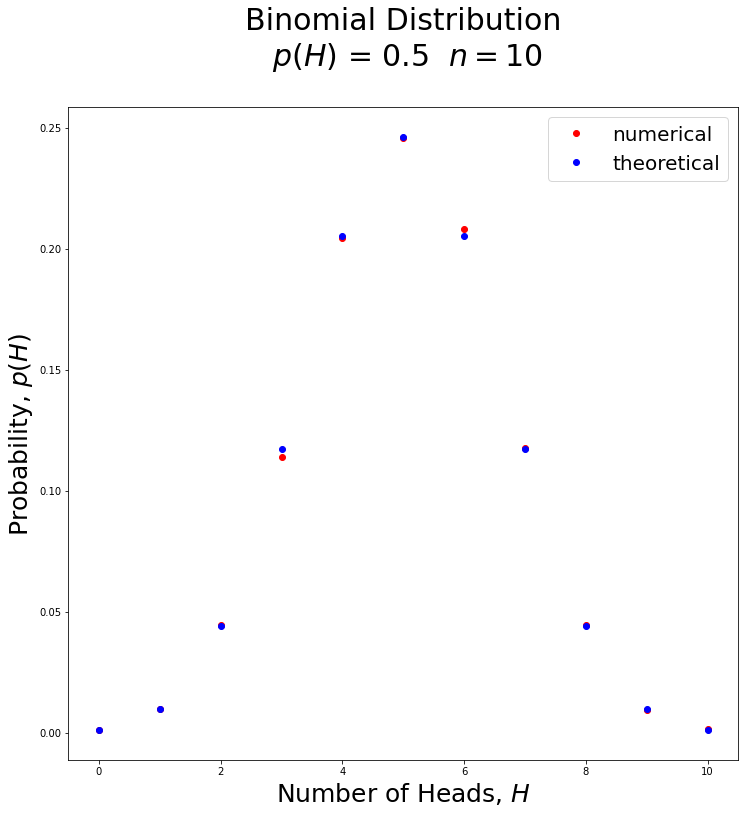

In [ ]:
plt.figure(figsize = (12,12))

plt.plot(heads, probability, "o", color  = 'red', label = 'numerical')
plt.plot(heads, theoretical_probability, "o", color  = 'blue', label = 'theoretical')

plt.legend(fontsize = 20)

plt.title('Binomial Distribution\n $p(H)$ = '+str(p)+'  $n = $'+str(n)+'\n', fontsize = 30)

plt.xlabel ('Number of Heads, $H$', fontsize = 25)
plt.ylabel ('Probability, $p(H)$', fontsize = 25)

plt.show()

# Problem 1:

Now let's consider a different scenario - Elections.

Consider a survey of a group of $50$ people about their choice in the upcoming election ( candidate $A$ vs candidate $B$ ). The choice of each person does not depend on any other person. Now, consider that the probability of a person to chose candidate $A$ to be $[10\%, 27\%, 47\%, 50\%, 60\%, 75\%]$. We are going to survey $20000$ groups.

What is the probability of candidate $A$ to win the supporters in a group?

In [ ]:
# Solution

N_groups = 20000
n_group = 50
p_A_list = [0.1, 0.27, 0.47, 0.5, 0.6, 0.75]

# a useful function that one can use is np.random.binomial() (to shorten the code)
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

for p_A in p_A_list:
    # trial_results = []
    # for i in range(N):
    #     trial = np.random.rand(n_group) <= p_A # returns a list of n_group boolean function (True = H, False = T)
    #     trial_results.append( np.sum(trial)) # computes the total number of supporters for candidate A for each trial
    trial_results = np.random.binomial(n_group, p_A, size = N_groups) 

    A_wins = 0 # setting the counter

    for x in trial_results:
        if x >= int(n_group/2 + 1):
            A_wins += 1 

    prob_A_win = (A_wins / len(trial_results))*100

    print(f'Given p_A = {p_A*100}%,\n the probability of candidate A to win at least {int(n_group/2 + 1)} votes is {round(prob_A_win , 2)}%\n')

Given p_A = 10.0%,
 the probability of candidate A to win at least 26 votes is 0.0%

Given p_A = 27.0%,
 the probability of candidate A to win at least 26 votes is 0.0%

Given p_A = 47.0%,
 the probability of candidate A to win at least 26 votes is 28.74%

Given p_A = 50.0%,
 the probability of candidate A to win at least 26 votes is 44.38%

Given p_A = 60.0%,
 the probability of candidate A to win at least 26 votes is 90.03%

Given p_A = 75.0%,
 the probability of candidate A to win at least 26 votes is 99.99%



# Problem 2:

Now let's consider a total of $500000$ groups of $100$ people in size and the probability of voting for candidate $A$ to be $[25\%, 50\%, 75\%]$. Plot the probability of candidate $A$ to obtain $[0, 1, 2, 3, ..., 100]$ votes in each group. In other words plot the probability density function and compare them to the theoretical results. Describe your observations. 

In [ ]:
N_groups = 500000
n_group = 100

p_A_list = [0.25, 0.5, 0.75]

prob = []
prob_theory = []

for p_A in p_A_list:

    probability = []                 # define an array that will hold the calculated probability based on the flips
    theoretical_probability = []     # define an array that will hold the theoretical probability

    # result = []
    # for i in range(N):
    #     trial = np.random.rand(n_group) <= p_A # returns a list of n_group boolean function (True = H, False = T)
    #     result.append( np.sum(trial)) # computes the total number of supporters for candidate A for each trial
    # print(result)
    result = np.random.binomial(n_group, p_A, size = N_groups)

    for x in range(n_group+1):

        cases = 0 

        for item in result:
            if item == x:
                cases += 1

        probability_cases = cases / N_groups
        probability.append(probability_cases)

        theoretical_result = ( fact(n_group) / ( fact(x) * fact(n_group-x) ) ) * (p_A**x) * (1-p_A)**(n_group-x)
        theoretical_probability.append(theoretical_result)

    prob.append(probability)
    prob_theory.append(theoretical_probability)


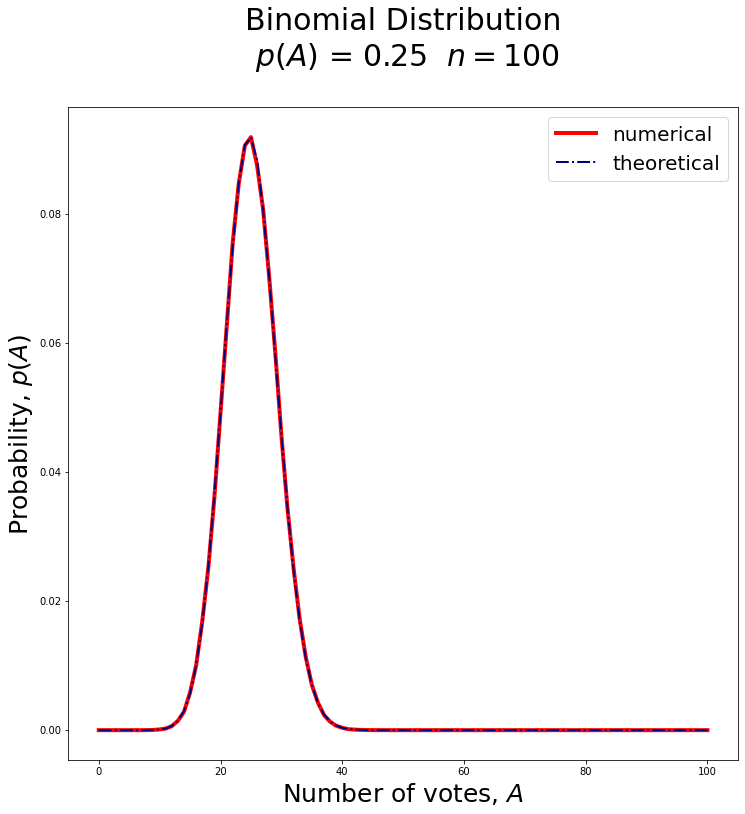

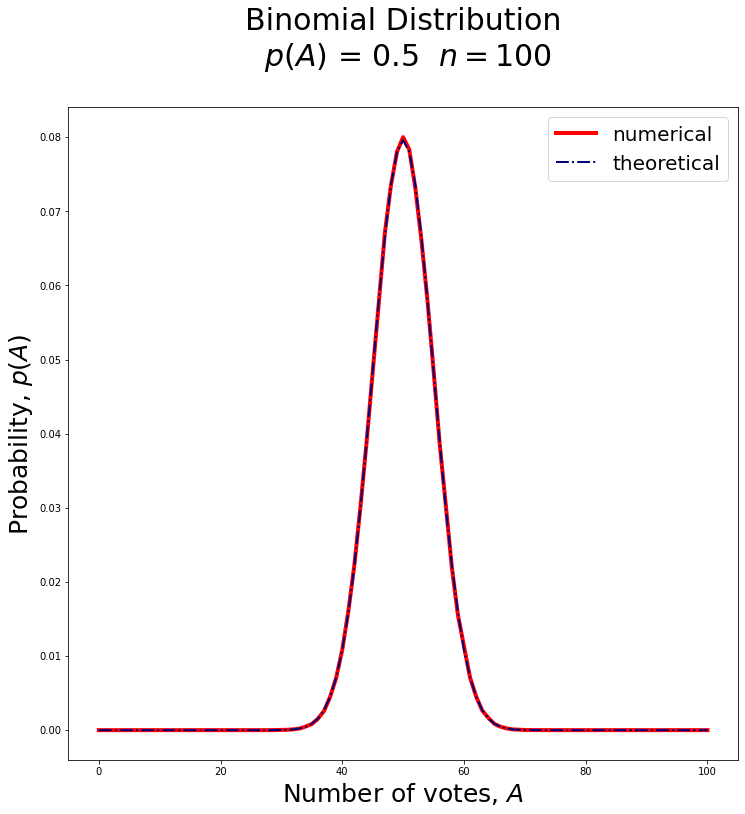

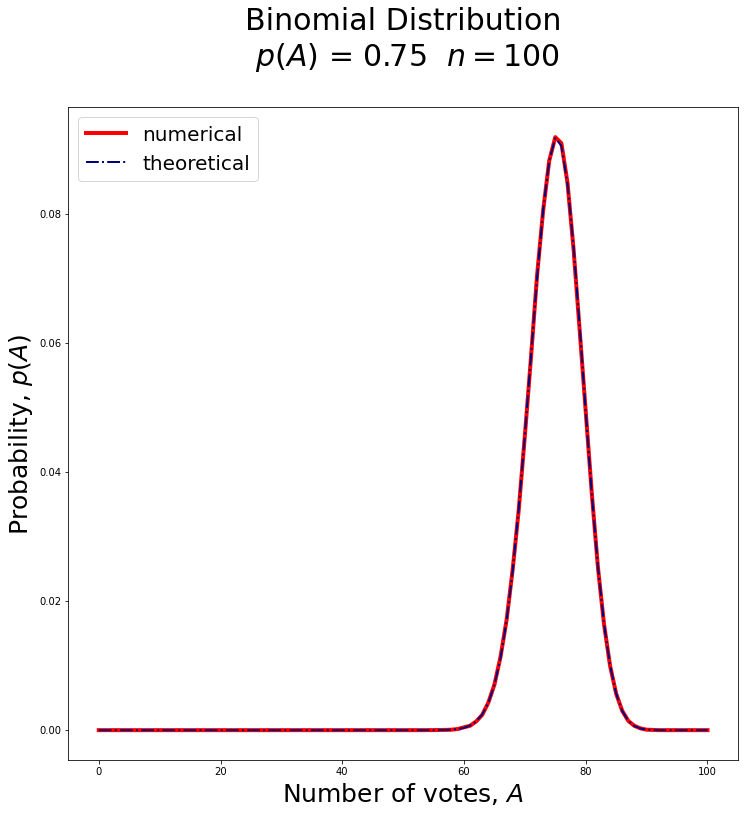

In [ ]:
people = np.arange(n_group+1)

for index in range(len(p_A_list)):

    plt.figure(figsize = (12,12))

    plt.plot(people, prob[index], color  = 'red', linewidth = 4, label = 'numerical')
    plt.plot(people, prob_theory[index], "-.", color  = 'navy', linewidth = 2 ,label = 'theoretical')

    plt.legend(fontsize = 20)

    plt.title('Binomial Distribution\n $p(A)$ = '+str(p_A_list[index])+'  $n = $'+str(n_group)+'\n', fontsize = 30)

    plt.xlabel ('Number of votes, $A$', fontsize = 25)
    plt.ylabel ('Probability, $p(A)$', fontsize = 25)

    plt.show()